In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("taelling_p_pladser.csv", parse_dates=['aar_mdr'])
df = df[(df['aar_mdr']>='2012') & (df['aar_mdr']<='2021')]
df = df.sort_values(by='aar_mdr')
# df = df[df.aar_mdr != '201405']
df['aar_mdr'] = df['aar_mdr'].apply(lambda x: str(x)).apply(lambda x : x[:4]+'/'+x[4:])
def format_geo(x):
    x = str(x)
    for i in ")(,":
        x = x.replace(i,'')
    x = x.split()[1:]
    locations = []
    for i in range(0,len(x),2):
        locations.append(x[i:i+2])
    return locations
df['wkb_geometry'] = df['wkb_geometry'].apply(format_geo)
df.head()

FID  pkey  taelle_id         vejnavn  \
13830  taelling_p_pladser.13812  2512       1063        Manøgade   
3542    taelling_p_pladser.3529  1311        283      Linnésgade   
11329  taelling_p_pladser.11313  2358        850  Spangbergsgade   
18128  taelling_p_pladser.18103  2834       1359   Vermlandsgade   
11319  taelling_p_pladser.11303  2357        849        Sorøgade   

                                            straekning  lovlig_p_kl_12  \
13830                                              NaN              45   
3542                      Nørre Voldgade - Vendersgade              23   
11329                                              NaN              14   
18128  Kløvermarksvej - Uplandsgade (lige husnr.-side)              54   
11319                                              NaN              11   

       parkerede_biler_kl_12  belaegning_kl_12_pct  lovlig_p_kl_17  \
13830                   28.0                  62.0              45   
3542                    29.0                 126.0              29   
11329                    8.0                  57.0              14   
18128                   23.0                  43.0              54   
11319                   10.0                  91.0              11   

       parkerede_biler_kl_17  ...  parkerede_biler_kl_22  \
13830                   40.0  ...                   47.0   
3542                    35.0  ...                   22.0   
11329                   11.0  ...                   14.0   
18128                   20.0  ...                   17.0   
11319                   14.0  ...                   13.0   

       belaegning_kl_22_pct  bemaerkning  kategori  aar_mdr         vej_id  \
13830                 104.0          NaN       NaN  2012/03  1014620000000   
3542                   76.0          NaN       NaN  2012/03  1014352000000   
11329                 100.0          NaN       NaN  2012/03  1016752000000   
18128                  31.0          NaN       NaN  2012/03  1018176000H00   
11319                 118.0          NaN       NaN  2012/03  1016744000000   

       fra_m  til_m                                       wkb_geometry    id  
13830    0.0  155.0  [[12.568481996781287, 55.707662169756816], [12...   868  
3542     0.0  230.0  [[12.568985787018738, 55.682019943834746], [12...  2409  
11329    9.0   58.0  [[12.590125999033274, 55.70256094717452], [12....   709  
18128  238.0  943.0  [[12.600517683796513, 55.66862888001223], [12....  1146  
11319    5.0   54.0  [[12.581093951323796, 55.698685315362766], [12...   708  

[5 rows x 22 columns]

In [3]:
cols = list(df)
df = df.dropna(subset=cols[5:14])

In [4]:
# total occupancy rate
total_rate = df.groupby('aar_mdr').sum()
total_rate['total_rate_12'] = total_rate['belaegning_kl_12_pct']
total_rate['total_rate_17'] = total_rate['belaegning_kl_17_pct']
total_rate['total_rate_22'] = total_rate['belaegning_kl_22_pct']
for i, row in total_rate.iterrows():
    data_count = df[df['aar_mdr'] == i].shape[0]
    total_rate.loc[i, 'total_rate_12'] = row['belaegning_kl_12_pct']/data_count
    total_rate.loc[i, 'total_rate_17'] = row['belaegning_kl_17_pct']/data_count
    total_rate.loc[i, 'total_rate_22'] = row['belaegning_kl_22_pct']/data_count
total_rate

pkey  taelle_id  lovlig_p_kl_12  parkerede_biler_kl_12  \
aar_mdr                                                               
2012/03   2978044    1108302           60227                41852.0   
2013/03   1282654    1280823           61443                42988.0   
2013/09   5754908    1288313           61712                43855.5   
2014/03   6673095    1125019           61828                43838.0   
2014/05    114402      40180             948                  653.0   
2014/09   8445977    1131397           62046                45754.0   
2015/03  12366744    1227193           63265                45924.0   
2015/09  10573817    1239378           63147                47789.0   
2016/03  14833414    1251205           63463                47879.0   
2016/09  19251190    1434856           63197                48830.0   
2017/03  28079177    3037354           75573                53930.0   
2017/09  24077242    2852995           75370                54927.0   
2018/03  24042155    1468458           63793                46732.0   
2018/09  26424799    1565669           64586                48391.0   
2019/03  34585317    3192382           78196                56431.0   
2019/09  37423898    3192294           78240                57518.0   
2020/09  40659817    3248351           78455                59866.0   

         belaegning_kl_12_pct  lovlig_p_kl_17  parkerede_biler_kl_17  \
aar_mdr                                                                
2012/03          99212.510951           59526               45573.00   
2013/03         102177.000000           60705               46150.00   
2013/09          99596.000000           61027               46284.75   
2014/03         102272.000000           61272               46613.00   
2014/05           1511.000000             948                 534.00   
2014/09         105998.000000           61500               48082.00   
2015/03         105978.000000           62630               48613.00   
2015/09         112219.000000           62497               50442.00   
2016/03         111174.000000           62774               50442.00   
2016/09         113190.000000           62521               51290.00   
2017/03         126424.000000           74971               58028.00   
2017/09         130634.000000           74724               59380.00   
2018/03         110195.000000           63148               51212.00   
2018/09         112694.000000           63950               52549.00   
2019/03         132131.000000           77520               61661.00   
2019/09         131932.000000           77648               62561.00   
2020/09         137987.000000           77965               63700.00   

         belaegning_kl_17_pct  lovlig_p_kl_22  parkerede_biler_kl_22  \
aar_mdr                                                                
2012/03         107511.321835           60464                48949.0   
2013/03         109713.000000           61701                49670.0   
2013/09         104706.000000           61982                50557.0   
2014/03         107479.000000           62005                51003.0   
2014/05           1229.000000             948                  602.0   
2014/09         110668.000000           62231                51929.0   
2015/03         111144.000000           63447                53177.0   
2015/09         118146.000000           63332                54483.0   
2016/03         116266.000000           63776                54464.0   
2016/09         118051.000000           63571                55686.0   
2017/03         135021.000000           76097                63349.0   
2017/09         140221.000000           75920                64708.0   
2018/03         121668.000000           64157                55528.0   
2018/09         122079.000000           64955                56802.0   
2019/03         142604.000000           78476                66693.0   
2019/09         143023.000000           78580                67208.0  

In [5]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [6]:
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, output_file, show
from bokeh.models import FactorRange

p = figure(plot_width=800, plot_height=250, x_range = FactorRange(factors=total_rate.index), title="Parking Occupancy Rate", x_axis_label='Date', y_axis_label='Occupancy Rate')

for data, color in zip(['total_rate_12', 'total_rate_17', 'total_rate_22'], Spectral4):
    p.line(total_rate.index, total_rate[data], line_width=2, color=color, alpha=0.8, legend_label=data)

p.legend.location = "bottom_right"
p.legend.click_policy="hide"
show(p)

In [7]:
import folium
cp_map = folium.Map(location=[55.6760968, 12.5683371], zoom_start=13)
cp_map

In [8]:
# geo_data = 'parking_number.geojson'
df_201703 = df[df['aar_mdr'] == '2017/03']
df_201703 = df_201703.dropna(subset=['wkb_geometry'])
df_201703 = df_201703[df_201703['wkb_geometry'].apply(lambda x: len(x)) > 0]
df_201703 = df_201703[df_201703['lovlig_p_kl_12']!=0]
df_201703 = df_201703[df_201703['lovlig_p_kl_17']!=0]
df_201703 = df_201703[df_201703['lovlig_p_kl_22']!=0]
df_201703 = df_201703.drop_duplicates(subset=['taelle_id'], keep='first')

import colorsys

for i, row in df_201703.iterrows():
    points = []
    if len(row['wkb_geometry']) == 0:
        continue
    rate = int(row['belaegning_kl_12_pct'])
    if rate > 100:
        rate = 100
    rgb = colorsys.hsv_to_rgb((100 -rate)/ 300., 1.0, 1.0)
    color = '#%02x%02x%02x' % tuple([round(255*x) for x in rgb])
    for location in row['wkb_geometry']:
        point = []
        point.append(float(location[1]))
        point.append(float(location[0]))
        points.append(point)
    popup = row['vejnavn'] + '-' + str(rate) + '%'
    folium.PolyLine(points, color=color, popup=popup).add_to(cp_map)
cp_map

In [9]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# %config InlineBackend.figure_format = 'svg'
# sns.set()

# fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(10,15))
# fig.tight_layout(h_pad=2.0)
# fig.subplots_adjust(top=0.95)

# for indx, i in enumerate(df['aar_mdr'].unique()[1:]):
#     df_time = df[df['aar_mdr']==i].nlargest(10, 'belaegning_kl_12_pct')
#     axes[indx//2, indx%2].bar(df_time['vejnavn'].values, df_time['belaegning_kl_12_pct'].values, color ='seagreen', width = 0.4)
#     axes[indx//2, indx%2].tick_params(axis='x', labelrotation = 90)
#     axes[indx//2, indx%2].set_title(i + " " + "Top 10 Occupancy Road")
# plt.show()

In [10]:
import glob

path = r'./Transaction' # use your path
all_files = glob.glob(path + "/*.csv")
tf = pd.concat((pd.read_csv(f, sep=';', encoding='iso-8859-1') for f in all_files))
tf['Dato/tid parkeringsstart'] = pd.to_datetime(tf['Dato/tid parkeringsstart'])
tf['Dato/tid parkeringsslut'] = pd.to_datetime(tf['Dato/tid parkeringsslut'])
tf = tf.sort_values(by='Dato/tid parkeringsstart')
tf.head()

Sættype Betalingsmåde  Automat                   Lokation  \
0  Betaling        Mønter     3595  COLBJØRNSENSGADE       15   
1  Betaling        Mønter     1287  NYROPSGADE             27   
2  Betaling        Mønter     1288                        NaN   
3  Betaling  VISA Dankort     2442  WILLEMOESGADE          66   
4  Betaling        Mønter     2184  POLITITORVET           14   

                     Zone Dato/tid parkeringsstart Dato/tid parkeringsslut  \
0  200 - 200 - Grøn del 1      2015-01-01 00:00:00     2015-02-01 08:07:00   
1  200 - 200 - Grøn del 1      2015-01-01 00:01:00     2015-02-01 08:17:00   
2                   ? - ?      2015-01-01 00:01:00     2015-02-01 08:03:00   
3  315 - 315 - Blå del 16      2015-01-01 00:01:00     2015-02-01 12:05:00   
4  200 - 200 - Grøn del 1      2015-01-01 00:04:00     2015-02-01 08:03:00   

       Beløb Kreditkortgebyr  
0   2,00 DKK        0,00 DKK  
1   5,00 DKK        0,00 DKK  
2   1,00 DKK        0,00 DKK  
3  45,00 DKK        0,50 DKK  
4   1,00 DKK        0,00 DKK

In [11]:
tf.tail(5)

Sættype   Betalingsmåde  Automat  \
538649              Betaling    VISA Dankort     4453   
538648              Betaling          Mønter     7141   
538650              Betaling  VISA internat.     2184   
538652              Betaling          Mønter     2740   
538651  Fejlende transaktion  Credit Card 37     4095   

                         Lokation                    Zone  \
538649  STRANDGADE             28  208 - 208 - Grøn del 9   
538648  INGERSLEVSGADE         40  203 - 203 - Grøn del 4   
538650  POLITITORVET           14  200 - 200 - Grøn del 1   
538652             HAMMERICHGADE   201 - 201 - Grøn del 2   
538651  OTTO MØNSTEDS GADE      5  201 - 201 - Grøn del 2   

       Dato/tid parkeringsstart Dato/tid parkeringsslut      Beløb  \
538649      2015-12-31 23:57:00     2016-02-01 08:09:00   3,00 DKK   
538648      2015-12-31 23:57:00     2016-02-01 08:16:00   5,00 DKK   
538650      2015-12-31 23:58:00     2016-02-01 11:20:00  60,00 DKK   
538652      2015-12-31 23:59:00     2016-02-01 08:03:00   1,00 DKK   
538651      2015-12-31 23:59:00     2016-02-01 06:35:00   0,00 DKK   

       Kreditkortgebyr  
538649        0,50 DKK  
538648        0,00 DKK  
538650        1,95 DKK  
538652        0,00 DKK  
538651        0,00 DKK

In [12]:
mask = (tf['Dato/tid parkeringsstart'] > '2015-09-15') & (tf['Dato/tid parkeringsstart'] <= '2015-09-17')
tf.loc[mask]

Sættype   Betalingsmåde  Automat                   Lokation  \
283135  Betaling          Mønter     3049  DYBBØLSGADE            48   
283134  Betaling          Mønter     4193                        NaN   
283136  Betaling          Mønter     3998                        NaN   
283137  Betaling          Mønter     2735  BORGERGADE              2   
283138  Betaling  VISA internat.     1137  BLEGDAMSVEJ            10   
...          ...             ...      ...                        ...   
329657  Betaling          Mønter     4001            VESTER VOLDGADE   
329658  Betaling          Mønter     1039  GRIFFENFELDSGADE       34   
329659  Betaling          Mønter     4320  STOCKHOLMSGADE         31   
329660  Betaling          Mønter     3147                        NaN   
329661  Betaling          Mønter     3064  MATTHÆUSGADE           23   

                          Zone Dato/tid parkeringsstart  \
283135   307 - 307 - Blå del 8      2015-09-15 00:01:00   
283134                   ? - ?      2015-09-15 00:01:00   
283136                   ? - ?      2015-09-15 00:01:00   
283137  203 - 203 - Grøn del 4      2015-09-15 00:02:00   
283138   302 - 302 - Blå del 3      2015-09-15 00:03:00   
...                        ...                      ...   
329657                   ? - ?      2015-09-16 23:58:00   
329658   300 - 300 - Blå del 1      2015-09-16 23:59:00   
329659  205 - 205 - Grøn del 6      2015-09-17 00:00:00   
329660                   ? - ?      2015-09-17 00:00:00   
329661   307 - 307 - Blå del 8      2015-09-17 00:00:00   

       Dato/tid parkeringsslut      Beløb Kreditkortgebyr  
283135     2015-09-15 09:06:00  36,00 DKK        0,00 DKK  
283134     2015-09-15 08:01:00  24,00 DKK        0,00 DKK  
283136     2015-09-15 03:01:00   9,00 DKK        0,00 DKK  
283137     2015-09-15 02:02:00   6,00 DKK        0,00 DKK  
283138     2015-09-15 08:33:00  30,00 DKK        1,95 DKK  
...                        ...        ...             ...  
329657     2015-09-17 00:38:00   2,00 DKK        0,00 DKK  
329658     2015-09-17 03:59:00  12,00 DKK        0,00 DKK  
329659     2015-09-17 09:27:00  50,00 DKK        0,00 DKK  
329660     2015-09-17 00:40:00   2,00 DKK        0,00 DKK  
329661     2015-09-17 06:40:00  20,00 DKK        0,00 DKK  

[46528 rows x 9 columns]

In [13]:
mf = pd.read_csv('parkomat.csv')
# mf.loc[mf['parkomat_id'] == 3595]
mf.shape[0]

1602

In [14]:
# Datasize
print("Size of Parking Occupancy Dataset: {}".format(df.shape[0]))
print("Size of Parking Transaction Dataset: {}".format(tf.shape[0]))
print("Number of Parking Machine: {}".format(len(tf['Automat'].unique())))

Size of Parking Occupancy Dataset: 24373
Size of Parking Transaction Dataset: 7192739
Number of Parking Machine: 1523


In [15]:
len(df['taelle_id'].unique())

2007

In [16]:
df_201703['illegal'] = df_201703['parkerede_biler_kl_22'] - df_201703['lovlig_p_kl_22']
df_201703 = df_201703[df_201703['illegal'] > 0]
df_201703['Y'] = df_201703['wkb_geometry'].apply(lambda x : x[0][1])
df_201703.head(10)

FID   pkey  taelle_id            vejnavn  \
16809  taelling_p_pladser.16786  14844       1265      Kirkegårdsvej   
15044  taelling_p_pladser.15028  14727       1146          Gormsgade   
13197  taelling_p_pladser.13172  14606       1018         Nyborggade   
14760  taelling_p_pladser.14739  14708       1125         Vibekegade   
2438    taelling_p_pladser.2427  13856        199  Frederiksborggade   
14170  taelling_p_pladser.14144  14669       1085        Haraldsgade   
17231  taelling_p_pladser.17208  14871       1294           Genuavej   
17252  taelling_p_pladser.17232  14873       1297       Kvintus Allé   
15352  taelling_p_pladser.15418  14754       1173      Høsterkøbgade   
16416  taelling_p_pladser.16615  14833       1254   Torben Oxes Allé   

                          straekning  lovlig_p_kl_12  parkerede_biler_kl_12  \
16809                            NaN              95                   95.0   
15044                            NaN              46                   46.0   
13197                            NaN              82                   56.0   
14760                            NaN              64                   40.0   
2438   Søtorvet - Nørre Farimagsgade              18                   28.0   
14170     Lersø Parkalle - Lyngbyvej              27                   33.0   
17231          Messinavej - Genuavej               7                    2.0   
17252                            NaN              34                   25.0   
15352                            NaN              28                   23.0   
16416                            NaN              10                   10.0   

       belaegning_kl_12_pct  lovlig_p_kl_17  parkerede_biler_kl_17  ...  \
16809                 100.0              95                  135.0  ...   
15044                 100.0              46                   47.0  ...   
13197                  68.0              82                   81.0  ...   
14760                  63.0              64                   52.0  ...   
2438                  156.0              18                   21.0  ...   
14170                 122.0              24                   31.0  ...   
17231                  29.0               7                    4.0  ...   
17252                  74.0              34                   32.0  ...   
15352                  82.0              28                   27.0  ...   
16416                 100.0              10                   10.0  ...   

       bemaerkning  kategori  aar_mdr         vej_id  fra_m   til_m  \
16809          NaN       NaN  2017/03  1013684000000    3.0   579.0   
15044          NaN       NaN  2017/03  1012268000000    0.0   163.0   
13197          NaN       NaN  2017/03  1015088000000   14.0   343.0   
14760          NaN       NaN  2017/03  1018280000000    0.0   294.0   
2438           NaN       NaN  2017/03  1011936000000  430.0   628.0   
14170          NaN       NaN  2017/03  1012620000000  779.0  1166.0   
17231          NaN       NaN  2017/03  1012168020000    7.0    61.0   
17252          NaN       NaN  2017/03  1014032000000   16.0   135.0   
15352          NaN       NaN  2017/03  1013244000000    0.0    91.0   
16416          NaN       NaN  2017/03  1017560000000    0.0    80.0   

                                            wkb_geometry    id  illegal  \
16809  [[12.610631025826796, 55.65969000798142], [12....  1061     34.0   
15044  [[12.54516231392736, 55.696784015114986], [12....   946      9.0   
13197  [[12.577796061387334, 55.709735366869715], [12...   825      1.0   
14760  [[12.555174347758264, 55.70709872332631], [12....   926      4.0   
2438   [[12.56820284189339, 55.68498778552024], [12.5...   144      6.0   
14170  [[12.557072621608592, 55.70815695579228], [12....   889     22.0   
17231  [[12.622259313479976, 55.660119052986516], [12...  1088      2.0   
17252  [[12.619249266276354, 55.66104467357372], [12....  1090      1.0   
15352  [[12.5397246792411, 55.694621119324815], [12.5...   972      4.0   
16416  

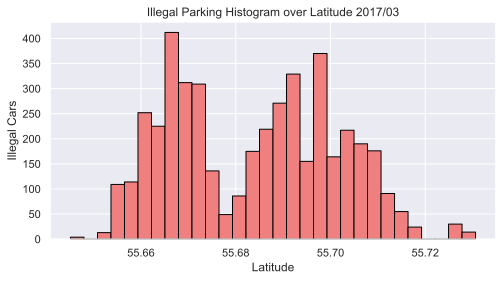

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg'
sns.set()

df_201703['Y'] = np.array(df_201703['Y'], dtype=float)

frq, edges = np.histogram(df_201703['Y'], bins=30)

illegal_sum = []
for i in range(len(edges) - 1):
    temp = df_201703[(df_201703['Y'] >= edges[i]) & (df_201703['Y'] <= edges[i+1])]
    illegal_sum.append(temp['illegal'].sum())        
    
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(edges[:-1], illegal_sum, width=np.diff(edges), edgecolor="black", align="edge", color='lightcoral')
ax.set_title('Illegal Parking Histogram over Latitude 2017/03')
ax.axes.set_xlabel('Latitude')
ax.axes.set_ylabel('Illegal Cars')
plt.show()

In [21]:
tf['StartTime'] = tf['Dato/tid parkeringsstart'].dt.hour + (tf['Dato/tid parkeringsstart'].dt.minute)/60
tf['EndTime'] = tf['Dato/tid parkeringsslut'].dt.hour + (tf['Dato/tid parkeringsslut'].dt.minute)/60
tf.tail()

Sættype   Betalingsmåde  Automat  \
538649              Betaling    VISA Dankort     4453   
538648              Betaling          Mønter     7141   
538650              Betaling  VISA internat.     2184   
538652              Betaling          Mønter     2740   
538651  Fejlende transaktion  Credit Card 37     4095   

                         Lokation                    Zone  \
538649  STRANDGADE             28  208 - 208 - Grøn del 9   
538648  INGERSLEVSGADE         40  203 - 203 - Grøn del 4   
538650  POLITITORVET           14  200 - 200 - Grøn del 1   
538652             HAMMERICHGADE   201 - 201 - Grøn del 2   
538651  OTTO MØNSTEDS GADE      5  201 - 201 - Grøn del 2   

       Dato/tid parkeringsstart Dato/tid parkeringsslut      Beløb  \
538649      2015-12-31 23:57:00     2016-02-01 08:09:00   3,00 DKK   
538648      2015-12-31 23:57:00     2016-02-01 08:16:00   5,00 DKK   
538650      2015-12-31 23:58:00     2016-02-01 11:20:00  60,00 DKK   
538652      2015-12-31 23:59:00     2016-02-01 08:03:00   1,00 DKK   
538651      2015-12-31 23:59:00     2016-02-01 06:35:00   0,00 DKK   

       Kreditkortgebyr       Time  StartTime    EndTime  
538649        0,50 DKK  23.950000  23.950000   8.150000  
538648        0,00 DKK  23.950000  23.950000   8.266667  
538650        1,95 DKK  23.966667  23.966667  11.333333  
538652        0,00 DKK  23.983333  23.983333   8.050000  
538651        0,00 DKK  23.983333  23.983333   6.583333

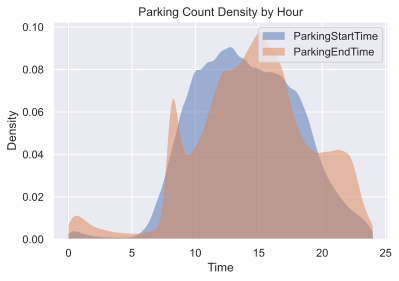

In [27]:
sns.kdeplot(data=tf, x='StartTime', label='ParkingStartTime', bw_adjust=2, cut=0, fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)
ax = sns.kdeplot(data=tf, x='EndTime', label='ParkingEndTime', bw_adjust=2, cut=0, fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)
plt.legend()
ax.axes.set_xlabel('Time')
ax.set_title('Parking Count Density by Hour')
plt.show()

In [41]:
machines = tf.groupby('Automat')['Sættype'].count().nlargest(10).index.tolist()

<ipython-input-50-07b0d42f1876>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(machines, rotation=90)


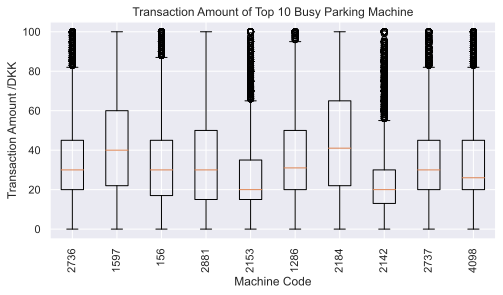

In [50]:
import re

fig, ax = plt.subplots(figsize=(8, 4))

data = []
for i, mat in enumerate(machines):
    tf_ma = tf[tf['Automat'] == mat]
    lst = [] 
    for x in tf_ma['Beløb'].values:
        amount = float(re.findall("\d+\,\d+", x)[0].replace(',','.'))
        if amount > 100:
            continue
        lst.append(amount)
    arr = np.array(lst)
    data.append(arr)
ax.set_xticklabels(machines, rotation=90)
ax.axes.set_xlabel('Machine Code')
ax.axes.set_ylabel('Transaction Amount /DKK')
ax.set_title('Transaction Amount of Top 10 Busy Parking Machine')
ax.boxplot(data)
plt.show()